# Data Preparation com Numpy e Pandas
**Bem-vind@ ao mundo da ciência de dados**

Conecte-se a mim!
<table align="left">
    <tr>
        <td><a href="https://github.com/jairojuunior"><img src="github.svg" height=50 width=30></a></td>
        <td><a href="https://www.linkedin.com/in/jairofreitas/"><img src="linkedin-icon.png" height=30 width=30></a></td>
        <td><a href="" alt="Jairo da Silva Freitas Júnior"><img src="iu-conecta.jpg" height=30 width=30></a></td>
    </tr>
</table>

## Índice
* [Introdução](#Introdução)
* [Pandas e Numpy](#Pandas-e-NumPy)
* [Case 1: Faltas em Consultas Médicas](#Case-1:-Faltas-em-Consultas-Médicas)
* * [Data Ingestion com Pandas](#Data-Ingestion-com-Pandas)
* * [Data Cleansing](#Data-Cleansing)
* * * [.astype() e .to_datetime()](#.astype-.to_datetime)
* * * [.apply()](#.apply)
* * * [.dt.date](#.dt.date)
* * * [.dt.dayofweek](#.dt.dayofweek)
* * [Data Exploration](#Data-Exploration)
* * * [.loc](#.loc[])
* * * [.drop_duplicates()](#.drop_duplicates)
* * * [.index](#.index)
* [Case 2: Análise de dados da bolsa de valores](#Case-2:-Análise-de-dados-da-bolsa-de-valores)
* * [Calculando correlações com Pandas](#Calculando-correlações-com-Pandas)
* * [.where()](#.where)
* * [.dropna()](#.dropna)
* * [.tolist()](#.tolist)
* * [Construindo uma função que calcula uma matriz de correlações](#Construindo-uma-função-que-calcula-uma-matriz-de-correlações)
* * [Plotando os papéis com pandas.plot](#Plotando-os-papéis-com-pandas.plot)
* * [Bônus: Plotando um Candlestick](#Bônus:-Plotando-um-Candlestick)


## Introdução
<img src="aula3-images/data-factory.png" align="center">
Data preparation é uma das etapas mais críticas no pipeline do cientista ou analista de dados. Consiste em preparar dados brutos e separados para análises e modelagens futuras. Esta etapa precisa produzir **dados válidos** (tipos e formatos), **completos**, **consistentes** (sem contradições) e **confiáveis**.<br>
As principais e mais genéricas etapas deste processamento são:
* **Data ingestion**: Geralmente é a etapa de importação do dado
* **Data fusion**: Integração de fontes diversas de dados
* **Data cleansing**: Detecção e correção de registros inválidos, inconsistentes ou não confiáveis
* **Data augmentation**: Criação de novos registros a partir de variações dos registros disponíveis (ex: imagens rotacionadas)
<br>
<br>
<img src="aula3-images/dataprep-pipeline.jpg" align="center">

## Pandas e NumPy
<img src="aula3-images/pandas.png">
**Pandas** é uma biblioteca que provê de forma fácil de usar e com alta performance estruturas de dados para processamento e análise de dados. Embora não seja uma comparação justa, é conhecida popularmente como o Excel do Python, por sua facilidade de uso e versatilidade.
<br><br>
<img src="aula3-images/numpy.png" width=340 height=165>
**NumPy** é uma das principais bibliotecas para computação científica em Python. Oferece ferramentas para facilmente realizar cálculos vetoriais e operações de álgebra linear.
<br><br>
Via de regra, utilizamos estas **duas bibliotecas em conjunto**. Pandas nos oferecem uma forma fácil de processar os dados e o NumPy permite que realizemos operações matemáticas interessantes sobre os dados armazenados nos DataFrames. 

## Case 1: Faltas em Consultas Médicas
### Data Ingestion com Pandas

### Faltas (no shows) em Consultas Médicas 
#### Por que em 30% das consultas o paciente falta?
**Dataset**: Medical Appointment No Shows (https://www.kaggle.com/joniarroba/noshowappointments/version/5#_=_) <br>
**Data de Extração**: 19/05/2018 <br>
**Formato**: CSV
#### Dicionário dos dados
<table>
    <tr>
        <th style="text-align:left">Atributo</th>
        <th style="text-align:left">Descrição</th>
    </tr>
    <tr>
        <td style="text-align:left style="text-align:left"">PatientId</td>
        <td style="text-align:left" style="text-align:left style="text-align:left"">Identification of a patient</td>
    </tr>
    <tr>
        <td style="text-align:left">AppointmentID</td>
        <td style="text-align:left">Identification of each appointment</td>
    </tr>
    <tr>
        <td style="text-align:left">Gender</td>
        <td style="text-align:left">Male or Female</td>
    </tr>
    <tr>
        <td style="text-align:left">DataMarcacaoConsulta</td>
        <td style="text-align:left">The day of the actuall appointment, when they have to visit the doctor</td>
    </tr>
    <tr>
        <td style="text-align:left">DataAgendamento</td>
        <td style="text-align:left">The day someone called or registered the appointment, this is before appointment of course</td>
    </tr>
    <tr>
        <td style="text-align:left">Age</td>
        <td style="text-align:left" style="text-align:left">How old is the patient.</td>
    </tr>
    <tr>
        <td style="text-align:left">Neighbourhood</td>
        <td style="text-align:left">Where the appointment takes place</td>
    </tr>
    <tr>
        <td style="text-align:left">Scholarship</td>
        <td style="text-align:left">Ture of False. Observation, this is a broad topic, consider reading this article https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia</td>
    </tr>
    <tr>
        <td style="text-align:left">Hipertension</td>
        <td style="text-align:left" style="text-align:left">True or False</td>
    </tr>
    <tr>
        <td style="text-align:left">Diabetes</td>
        <td style="text-align:left">True or False</td>
    </tr>
    <tr>
        <td style="text-align:left">Alcoholism</td>
        <td style="text-align:left">True or False</td>
    </tr>
    <tr>
        <td style="text-align:left">Handcap</td>
        <td style="text-align:left">True or False</td>
    </tr>
    <tr>
        <td style="text-align:left">SMS_received</td>
        <td style="text-align:left">1 or more messages sent to the patient</td>
    </tr>
    <tr>
        <td style="text-align:left">No-show</td>
        <td style="text-align:left">True or False</td>
    </tr>
</table>

In [1]:
import numpy as np
import pandas as pd

In [16]:
data = pd.read_csv('datasets/KaggleV2-May-2016.csv')

In [17]:
data.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### Data Cleansing

* Como sabemos, as colunas Scholarship, Hipertension, Diabetes, Alcoholism, Handcap e SMS_received são **booleanas**. 
* Além disso, ScheduledDay e AppointmentDay é **DateTime**. 
* Por fim, que tal trocar os valores de Yes/No da coluna No-show para **booleano**? 
<br>Vamos converter para usarmos os dados apropriadamente.
<a id=".astype-.to_datetime"></a>
### .astype() e to_datetime()
.astype() permite realizar conversões de tipos de variável (ex: para bool, int, etc.) No caso de conversão para datetime, use pd.to_datetime().

In [19]:
data['Scholarship'] = data['Scholarship'].astype('bool')
data['Hipertension'] = data['Hipertension'].astype('bool')
data['Diabetes'] = data['Diabetes'].astype('bool')
data['Alcoholism'] = data['Alcoholism'].astype('bool')
data['Handcap'] = data['SMS_received'].astype('bool')
data['SMS_received'] = data['SMS_received'].astype('bool')
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'])
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null bool
Hipertension      110527 non-null bool
Diabetes          110527 non-null bool
Alcoholism        110527 non-null bool
Handcap           110527 non-null bool
SMS_received      110527 non-null bool
No-show           110527 non-null object
dtypes: bool(6), datetime64[ns](2), float64(1), int64(2), object(3)
memory usage: 7.4+ MB


<a id=".apply"></a>
### .apply()
.apply() aplica uma função ao longo de um eixo do dataframe. Se axis=0, aplica nas linhas, se axis=1, aplica nas colunas selecionadas. Sem querer forçar muito, dá pra fazer um paralelo com o map().

In [20]:
data['No-show2'] = data['No-show'].apply(lambda x: True if x == 'Yes' else False)
print(data.loc[:,'No-show':'No-show2'].head(15))
print(data.info())

   No-show  No-show2
0       No     False
1       No     False
2       No     False
3       No     False
4       No     False
5       No     False
6      Yes      True
7      Yes      True
8       No     False
9       No     False
10      No     False
11     Yes      True
12      No     False
13      No     False
14      No     False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null bool
Hipertension      110527 non-null bool
Diabetes          110527 non-null bool
Alcoholism        110527 non-null bool
Handcap           110527 non-null bool
SMS_received      110527 non-null bool
No-show          

In [21]:
data.drop('No-show', axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null bool
Hipertension      110527 non-null bool
Diabetes          110527 non-null bool
Alcoholism        110527 non-null bool
Handcap           110527 non-null bool
SMS_received      110527 non-null bool
No-show2          110527 non-null bool
dtypes: bool(7), datetime64[ns](2), float64(1), int64(2), object(2)
memory usage: 6.6+ MB


<a id=".dt.date"></a>
### .dt.date
Melhor do que olhar uma data, é olhar quantos dias se passaram entre dois eventos. Por isso, vamos criar uma variável DeltaScheduledAppointment com tipo **timedelta**

In [22]:
data['DeltaScheduledAppointment'] = data['AppointmentDay'].dt.date - data['ScheduledDay'].dt.date

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
PatientId                    110527 non-null float64
AppointmentID                110527 non-null int64
Gender                       110527 non-null object
ScheduledDay                 110527 non-null datetime64[ns]
AppointmentDay               110527 non-null datetime64[ns]
Age                          110527 non-null int64
Neighbourhood                110527 non-null object
Scholarship                  110527 non-null bool
Hipertension                 110527 non-null bool
Diabetes                     110527 non-null bool
Alcoholism                   110527 non-null bool
Handcap                      110527 non-null bool
SMS_received                 110527 non-null bool
No-show2                     110527 non-null bool
DeltaScheduledAppointment    110527 non-null timedelta64[ns]
dtypes: bool(7), datetime64[ns](2), float64(1), int64(2), object(2), timedelta64[ns](1)
memory usag

In [24]:
data.loc[:,["ScheduledDay", "AppointmentDay", "DeltaScheduledAppointment"]].head(10)

,ScheduledDay,AppointmentDay,DeltaScheduledAppointment
0,2016-04-29 18:38:08,2016-04-29,0 days
1,2016-04-29 16:08:27,2016-04-29,0 days
2,2016-04-29 16:19:04,2016-04-29,0 days
3,2016-04-29 17:29:31,2016-04-29,0 days
4,2016-04-29 16:07:23,2016-04-29,0 days
5,2016-04-27 08:36:51,2016-04-29,2 days
6,2016-04-27 15:05:12,2016-04-29,2 days
7,2016-04-27 15:39:58,2016-04-29,2 days
8,2016-04-29 08:02:16,2016-04-29,0 days
9,2016-04-27 12:48:25,2016-04-29,2 days


### .dt.dayofweek
Vamos também criar uma coluna indicando o dia da semana da consulta médica

In [26]:
data['AppointmentDayOfWeek'] = data['AppointmentDay'].dt.dayofweek
#0 = Segunda; 6=Domingo

In [27]:
data.loc[:,['AppointmentDay', 'AppointmentDayOfWeek']].head()

,AppointmentDay,AppointmentDayOfWeek
0,2016-04-29,4
1,2016-04-29,4
2,2016-04-29,4
3,2016-04-29,4
4,2016-04-29,4


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 16 columns):
PatientId                    110527 non-null float64
AppointmentID                110527 non-null int64
Gender                       110527 non-null object
ScheduledDay                 110527 non-null datetime64[ns]
AppointmentDay               110527 non-null datetime64[ns]
Age                          110527 non-null int64
Neighbourhood                110527 non-null object
Scholarship                  110527 non-null bool
Hipertension                 110527 non-null bool
Diabetes                     110527 non-null bool
Alcoholism                   110527 non-null bool
Handcap                      110527 non-null bool
SMS_received                 110527 non-null bool
No-show2                     110527 non-null bool
DeltaScheduledAppointment    110527 non-null timedelta64[ns]
AppointmentDayOfWeek         110527 non-null int64
dtypes: bool(7), datetime64[ns](2), float64(1), 

### Data Exploration
#### Conhecendo e ganhando insights sobre os dados

In [29]:
print("Temos "+str(data["PatientId"].nunique())+" pacientes nos registros")
print("Temos "+str(data["AppointmentID"].nunique())+" solicitações de atendimentos nos registros")

Temos 62299 pacientes nos registros
Temos 110527 solicitações de atendimentos nos registros


### .loc[]
Vamos selecionar apenas os pacientes. .loc permite que façamos um recorte de um dataframe.
<a id=".drop_duplicates"></a>
### .drop_duplicates()
Drop duplicates é como o "remover duplicatas" do excel ou o "distinct" do SQL. 

In [31]:
pacientes = (data.loc[:,["PatientId","Gender","Age","Scholarship","Hipertension","Diabetes","Alcoholism","Handcap"]]
             .drop_duplicates())
print(len(pacientes))

75414


Parece que temos pacientes que mudaram de condição (idade, por exemplo) ao longo da base de dados. Vamos manter a condição mais recente deles.

In [32]:
#Ordenando por data do mais antigo pro mais recente e mantendo apenas a última ocorrência para um paciente
pacientes = (data.sort_values(by=["ScheduledDay"]).loc[:,["PatientId"]].drop_duplicates(keep='last'))
pacientes.head()

,PatientId
102795,1.216587e+12
102797,3.189960e+13
102796,9.582232e+12
102786,4.542871e+11
102791,9.416259e+14


### .index
.idex retorna um objeto contendo os índices das linhas de um dataframe. Neste caso, usaremos estes índices para filtrar em data apenas a última consulta dos pacientes.


In [33]:
#Agora procuro a linha correspondente ao último atendimento daquele paciente na base original.
pacientes = data.loc[pacientes.index.tolist()]
len(pacientes)

62299

In [38]:
pacientes.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show2,DeltaScheduledAppointment,AppointmentDayOfWeek
102795,1.216587e+12,5134197,F,2015-12-07 10:40:59,2016-06-03,27,SÃO CRISTÓVÃO,True,False,False,False,True,True,True,179 days,4
102797,3.189960e+13,5134220,F,2015-12-07 10:42:42,2016-06-03,48,MARUÍPE,False,True,True,False,True,True,False,179 days,4
102796,9.582232e+12,5134223,F,2015-12-07 10:43:01,2016-06-03,80,SÃO CRISTÓVÃO,False,True,True,False,True,True,False,179 days,4
102786,4.542871e+11,5134227,M,2015-12-07 10:43:34,2016-06-03,67,MARUÍPE,False,True,True,False,False,False,False,179 days,4
102791,9.416259e+14,5134228,F,2015-12-07 10:43:50,2016-06-03,77,SÃO CRISTÓVÃO,False,True,True,False,True,True,False,179 days,4


Agora queremos plotar a frequência de cada variável bool contra No-show

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
contagem = data.loc[:,"Scholarship":"SMS_received"].apply(pd.value_counts)/len(data)
contagemNoShows = (data.where(data["No-show2"]==True).loc[:,"Scholarship":"SMS_received"].apply(pd.value_counts)
                   /len(data.where(data["No-show2"]==True).dropna()))
print(contagem)
print(contagemNoShows)

       Scholarship  Hipertension  Diabetes  Alcoholism   Handcap  SMS_received
False     0.901734      0.802754  0.928135      0.9696  0.678974      0.678974
True      0.098266      0.197246  0.071865      0.0304  0.321026      0.321026
     Scholarship  Hipertension  Diabetes  Alcoholism   Handcap  SMS_received
0.0     0.884493      0.830996  0.935929    0.969667  0.561629      0.561629
1.0     0.115507      0.169004  0.064071    0.030333  0.438371      0.438371


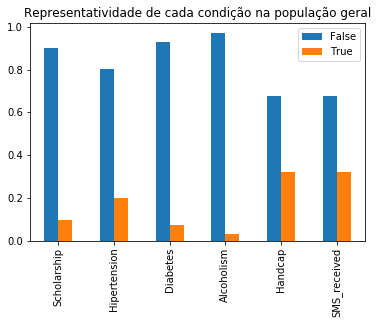

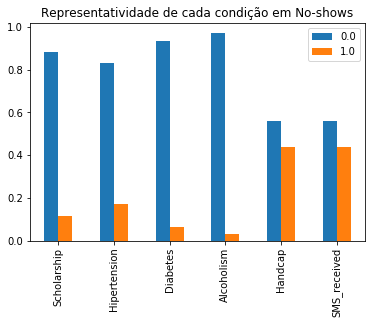

In [36]:
contagem.transpose().plot.bar()
plt.title("Representatividade de cada condição na população geral")
plt.show()
contagemNoShows.transpose().plot.bar()
plt.title("Representatividade de cada condição em No-shows")
plt.show()

Text(0.5,1,'Histograma da idade dos pacientes')

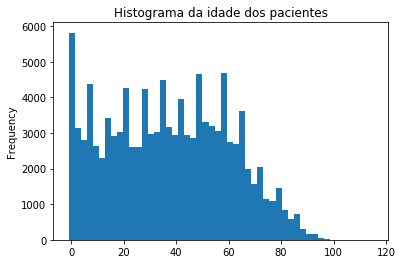

In [37]:
data["Age"].plot.hist(bins=50)
plt.title("Histograma da idade dos pacientes")

Ok, para um exemplo meramente ilustrativo já fomos bem longe demais. Bora trabalhar juntos em condições menos controladas?
<br>
## Case 2: Análise de dados da bolsa de valores
<img src="aula3-images/stock-market-the-ride.jpeg">
<br>
<br>
Ideias que podemos desenvolver:
* Calcular índice de úlcera por papel
* **Descobrir quais ações estão mais correlacionadas** (concluída DataLab 16/06/2018)

In [255]:
import pandas as pd #Importa pandas
import numpy as np #Importa Numpy

In [256]:
# Uma forma de dar uma olhada num arquivo, se você estiver no linux,
# é dar um head neles
! head -3 "datasets/COTAHIST_A2009_to_A2018P.csv"

,TIPREG,DATPRE,CODBDI,CODNEG,TPMERC,NOMRES,ESPECI,PRAZOT,MODREF,PREABE,PREMAX,PREMIN,PREMED,PREULT,PREOFC,PREOFV,TOTNEG,QUATOT,VOLTOT,PREEXE,INDOPC,DATVEN,FATCOT,PTOEXE,CODISI,DISMES
0,1,2017-01-02,2,AALR3,10,ALLIAR,ON      NM,,R$,14.62,14.88,14.4,14.58,14.6,14.6,14.73,87,35900,52350500,0,0,9999-12-31 00:00:00,1,0,BRAALRACNOR6,100
1,1,2017-01-02,10,ABCB2,10,ABC BRASIL,DIR PRE N2,,R$,2.85,2.85,2.85,2.85,2.85,2.0,0.0,1,200,57000,0,0,9999-12-31 00:00:00,1,0,BRABCBD10PR0,126


In [257]:
#Como ele está delimitado por vírgula, vamos importar diretamente
df = pd.read_csv("datasets/COTAHIST_A2009_to_A2018P.csv")

In [258]:
#Vamos dar uma olhada na base
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3357400 entries, 0 to 3357399
Data columns (total 27 columns):
Unnamed: 0    int64
TIPREG        int64
DATPRE        object
CODBDI        int64
CODNEG        object
TPMERC        int64
NOMRES        object
ESPECI        object
PRAZOT        float64
MODREF        object
PREABE        float64
PREMAX        float64
PREMIN        float64
PREMED        float64
PREULT        float64
PREOFC        float64
PREOFV        float64
TOTNEG        int64
QUATOT        int64
VOLTOT        int64
PREEXE        int64
INDOPC        int64
DATVEN        object
FATCOT        int64
PTOEXE        int64
CODISI        object
DISMES        int64
dtypes: float64(8), int64(12), object(7)
memory usage: 691.6+ MB


Metadados da base: https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=1&cad=rja&uact=8&ved=0ahUKEwicu6SKh9zbAhUGGZAKHTGtDBAQFggoMAA&url=http%3A%2F%2Fwww.bmfbovespa.com.br%2Flumis%2Fportal%2Ffile%2FfileDownload.jsp%3FfileId%3D8A828D294E9C618F014EB7924B803F8B&usg=AOvVaw1M5GqdJgS45Q2tWy2bMZ7m
<br>
<br>
Principais variáveis e seus significados:
* **DATNEG: Data do pregão**
* **CODNEG: Nome do papel**
* PREABE: Preço na abertura do mercado
* PREMAX: Preço máximo no dia
* PREMIN: Preço mínimo no dia
* **PREMED: Preço médio no dia**
* PREULT: Preço do último negócio do papel no dia 
* PREOFV: Preço da melhor oferta de venda do papel no dia
* PREOFC: Preço da melhor oferta de compra do papel no dia

In [139]:
#Como sempre, vamos dar uma boa olhada nas variáveis de interesse
df.loc[:,"PREABE":"PREOFV"].head(10)
#vamos usar a variável de preço médio PREMED

,PREABE,PREMAX,PREMIN,PREMED,PREULT,PREOFC,PREOFV
0,14.62,14.88,14.40,14.58,14.60,14.60,14.73
1,2.85,2.85,2.85,2.85,2.85,2.00,0.00
2,13.40,13.52,13.08,13.30,13.31,13.31,13.34
3,13.45,13.48,13.15,13.29,13.26,13.26,13.48
4,11.83,11.83,11.01,11.62,11.36,11.38,12.05
5,16.34,16.66,16.26,16.42,16.31,16.31,16.36
6,16.41,16.66,16.27,16.45,16.60,16.33,16.60
7,16.55,16.56,16.49,16.53,16.50,0.00,0.00
8,16.56,16.57,16.56,16.56,16.57,0.00,0.00
9,16.91,16.94,16.91,16.92,16.94,0.00,0.00


In [140]:
#Para este desafio, vamos usar apenas a DATPRE, CODNEG, PREMED
df_premed = df.loc[:,["DATPRE", "CODNEG", "PREMED"]]

In [141]:
df_premed.head(10)

,DATPRE,CODNEG,PREMED
0,2017-01-02,AALR3,14.58
1,2017-01-02,ABCB2,2.85
2,2017-01-02,ABCB4,13.30
3,2017-01-02,ABCB4F,13.29
4,2017-01-02,ABCP11,11.62
5,2017-01-02,ABEV3,16.42
6,2017-01-02,ABEV3F,16.45
7,2017-01-02,ABEV3T,16.53
8,2017-01-02,ABEV3T,16.56
9,2017-01-02,ABEV3T,16.92


In [144]:
#Como temos papeis com diversos vencimento, pegaremos apenas os papeis principais
#Eles possuem apenas 5 caracteres
df1 = df_premed.loc[df_premed["CODNEG"].str.len()==5]

In [145]:
df1.head()

,DATPRE,CODNEG,PREMED
0,2017-01-02,AALR3,14.58
1,2017-01-02,ABCB2,2.85
2,2017-01-02,ABCB4,13.30
5,2017-01-02,ABEV3,16.42
32,2017-01-02,ADHM3,0.78


In [146]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 681054 entries, 0 to 3357386
Data columns (total 3 columns):
DATPRE    681054 non-null object
CODNEG    681054 non-null object
PREMED    681054 non-null float64
dtypes: float64(1), object(2)
memory usage: 20.8+ MB


In [147]:
#Vamos converter a DATPRE para datetime
df1["DATANEG"] = pd.to_datetime(df1["DATPRE"])

/home/jairofreitas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [148]:
df1.head()

,DATPRE,CODNEG,PREMED,DATANEG
0,2017-01-02,AALR3,14.58,2017-01-02
1,2017-01-02,ABCB2,2.85,2017-01-02
2,2017-01-02,ABCB4,13.30,2017-01-02
5,2017-01-02,ABEV3,16.42,2017-01-02
32,2017-01-02,ADHM3,0.78,2017-01-02


In [149]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 681054 entries, 0 to 3357386
Data columns (total 4 columns):
DATPRE     681054 non-null object
CODNEG     681054 non-null object
PREMED     681054 non-null float64
DATANEG    681054 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 26.0+ MB


In [150]:
#Agora que temos DATNEG, podemos apagar a DATPRE
df1.drop("DATPRE",axis=1,inplace=True)

/home/jairofreitas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [151]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 681054 entries, 0 to 3357386
Data columns (total 3 columns):
CODNEG     681054 non-null object
PREMED     681054 non-null float64
DATANEG    681054 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 20.8+ MB


In [152]:
#Vamos selecionar os papeis
papeis  = df1["CODNEG"].drop_duplicates()

In [153]:
papeis.head()

0     AALR3
1     ABCB2
2     ABCB4
5     ABEV3
32    ADHM3
Name: CODNEG, dtype: object

In [154]:
len(papeis)

921

### Calculando correlações com Pandas

Com a base tratada e com uma série de papéis, podemos criar nosso motor de correlações

<a id=".where"></a>
### .where()
Podemos facilmente realizar filtros em Pandas usando o método .where()

In [182]:
#Vamos filtrar apenas as linhas do papel "ITUB4"
df1.where(df1["CODNEG"] == "ITUB4").head() #A saída será NaN

,CODNEG,PREMED,DATANEG
0,NaN,NaN,NaT
1,NaN,NaN,NaT
2,NaN,NaN,NaT
5,NaN,NaN,NaT
32,NaN,NaN,NaT


**O que aconteceu?** <br>
O where() cria uma máscara de filtro. Ou seja, ele mantem as linhas que desejamos e as demais ficam como NaN.<br>

<a id=".dropna"></a>
### .dropna()
Para excluir as linhas nulas, podemos usar o método dropna()

In [183]:
df1.where(df1["CODNEG"] == "ITUB4").dropna().head() #sucesso!

,CODNEG,PREMED,DATANEG
698,ITUB4,33.52,2017-01-02
2503,ITUB4,34.73,2017-01-03
4435,ITUB4,35.00,2017-01-04
6310,ITUB4,35.56,2017-01-05
8119,ITUB4,35.63,2017-01-06


<a id=".tolist"></a>
### .tolist()
Muitas vezes queremos transformar uma coluna em uma lista. Para fazer isso, basta usar o método tolist(). Veja como poderíamos obter uma lista do preço médio diário dos papeis ITUB4.

In [187]:
#Tipo que o método tolist() retorna:
print(type(df1["PREMED"].where(df1["CODNEG"] == "ITUB4").dropna().tolist()))
#Visualização dos valores diários do papel
print("Vetor do preço médio diário de ITUB4: "+str(df1["PREMED"].where(df1["CODNEG"] == "ITUB4").dropna().tolist()))

<class 'list'>
Vetor do preço médio diário de ITUB4: [33.52, 34.73, 35.0, 35.56, 35.63, 35.83, 35.86, 35.72, 36.62, 36.2, 35.91, 36.69, 36.74, 36.55, 36.69, 37.34, 37.6, 38.27, 38.21, 37.3, 37.2, 37.65, 37.47, 38.2, 38.21, 39.01, 39.37, 39.98, 40.01, 39.88, 39.94, 41.05, 41.15, 40.7, 41.06, 40.68, 40.8, 40.7, 40.03, 40.08, 39.57, 39.99, 40.0, 39.6, 39.04, 39.03, 39.34, 39.65, 39.77, 39.5, 39.33, 38.44, 38.34, 37.83, 38.06, 37.85, 38.14, 38.22, 38.38, 38.86, 38.53, 38.25, 38.3, 38.53, 38.23, 37.8, 38.1, 37.93, 37.83, 37.95, 37.39, 38.25, 38.62, 38.53, 38.07, 38.46, 38.55, 38.91, 39.2, 39.06, 39.93, 39.41, 38.47, 38.52, 38.83, 38.91, 39.1, 39.57, 40.05, 40.18, 40.12, 39.5, 34.92, 35.84, 34.69, 35.42, 35.96, 35.14, 35.8, 35.74, 35.9, 35.73, 35.36, 35.43, 35.45, 35.77, 36.61, 36.13, 35.8, 35.41, 35.96, 36.55, 36.07, 36.29, 35.83, 35.55, 35.69, 35.53, 36.28, 36.21, 36.0, 36.28, 36.78, 36.97, 36.97, 36.99, 36.56, 36.17, 36.43, 36.87, 37.08, 37.51, 37.42, 37.22, 37.16, 36.93, 36.79, 36.66, 36

### Construindo uma função que calcula uma matriz de correlações

In [156]:
correlacao = {}
#limit = número de papeis que desejamos correlacionar
limit = 50

In [157]:
for papel in papeis[:limit]:
    #print(papel, end=' ')
    correlacao[papel] = {}
    serie1 = pd.Series(df1["PREMED"].where(df1["CODNEG"] == papel).dropna().tolist(),
                   index=df1["DATANEG"].where(df1["CODNEG"] == papel).dropna())
    for papel2 in papeis[:limit]:
        #print(papel2, end=' ')
        if papel2 in correlacao.keys() == True :
            correlacao[papel][papel2] = correlacao[papel2][papel]
        else:
            serie2 = pd.Series(df1["PREMED"].where(df1["CODNEG"] == papel2).dropna().tolist(),
                       index=df1["DATANEG"].where(df1["CODNEG"] == papel2).dropna())
            correlacao[papel][papel2] = round(serie1.corr(serie2),2)     
    #print()

In [158]:
#Uma função para imprimir cada linha de um dicionário em uma linha da saída padrão
def imprime_dict(dicionario):
    #Para cada chave do dicionário
    for elem in dicionario:
        #Imprima os elementos desta chave
        print(elem + ": " + str(dicionario[elem]))
imprime_dict(correlacao)

AALR3: {'AALR3': 1.0, 'ABCB2': -0.83, 'ABCB4': 0.01, 'ABEV3': 0.28, 'ADHM3': -0.37, 'AFLT3': -0.13, 'AGRO3': 0.19, 'ALPA3': 0.26, 'ALPA4': 0.18, 'ALSC3': 0.18, 'AMAR3': 0.08, 'ANIM3': 0.05, 'ARZZ3': 0.13, 'ATOM3': -0.46, 'AZEV4': -0.22, 'BAUH4': 0.24, 'BAZA3': -0.24, 'BBAS3': -0.13, 'BBDC3': -0.24, 'BBDC4': -0.19, 'BBRK3': -0.31, 'BBSE3': 0.27, 'BEEF3': 0.15, 'BEES3': -0.06, 'BEES4': -0.08, 'BGIP4': 0.27, 'BMEB4': -0.14, 'BMKS3': 0.21, 'BOBR4': 0.31, 'BPAN4': -0.32, 'BPHA3': -0.16, 'BRAP3': -0.14, 'BRAP4': -0.2, 'BRFS3': 0.14, 'BRIN3': -0.04, 'BRIV4': 0.29, 'BRKM3': -0.01, 'BRKM5': 0.04, 'BRKM6': -0.24, 'BRML3': -0.29, 'BRPR3': 0.18, 'BRSR6': -0.1, 'BSEV3': -0.24, 'BTOW3': 0.18, 'BTTL3': 0.43, 'BVMF3': 0.19, 'CARD3': 0.1, 'CCPR3': -0.1, 'CCRO3': 0.23, 'CCXC3': -0.2}
ABCB2: {'AALR3': -0.83, 'ABCB2': 1.0, 'ABCB4': 0.85, 'ABEV3': 0.46, 'ADHM3': -0.03, 'AFLT3': 0.76, 'AGRO3': 0.61, 'ALPA3': 0.53, 'ALPA4': 0.52, 'ALSC3': 0.27, 'AMAR3': -0.1, 'ANIM3': 0.12, 'ARZZ3': 0.59, 'ATOM3': 0.67, 'AZE

In [159]:
correlacao.keys()

dict_keys(['AALR3', 'ABCB2', 'ABCB4', 'ABEV3', 'ADHM3', 'AFLT3', 'AGRO3', 'ALPA3', 'ALPA4', 'ALSC3', 'AMAR3', 'ANIM3', 'ARZZ3', 'ATOM3', 'AZEV4', 'BAUH4', 'BAZA3', 'BBAS3', 'BBDC3', 'BBDC4', 'BBRK3', 'BBSE3', 'BEEF3', 'BEES3', 'BEES4', 'BGIP4', 'BMEB4', 'BMKS3', 'BOBR4', 'BPAN4', 'BPHA3', 'BRAP3', 'BRAP4', 'BRFS3', 'BRIN3', 'BRIV4', 'BRKM3', 'BRKM5', 'BRKM6', 'BRML3', 'BRPR3', 'BRSR6', 'BSEV3', 'BTOW3', 'BTTL3', 'BVMF3', 'CARD3', 'CCPR3', 'CCRO3', 'CCXC3'])

In [167]:
correlacao["BBDC4"]

{'AALR3': -0.19,
 'ABCB2': 0.5,
 'ABCB4': 0.59,
 'ABEV3': -0.14,
 'ADHM3': 0.08,
 'AFLT3': 0.2,
 'AGRO3': -0.03,
 'ALPA3': 0.1,
 'ALPA4': 0.08,
 'ALSC3': 0.52,
 'AMAR3': 0.44,
 'ANIM3': 0.73,
 'ARZZ3': 0.52,
 'ATOM3': 0.77,
 'AZEV4': 0.16,
 'BAUH4': 0.28,
 'BAZA3': 0.08,
 'BBAS3': 0.75,
 'BBDC3': 0.71,
 'BBDC4': 1.0,
 'BBRK3': 0.35,
 'BBSE3': 0.34,
 'BEEF3': 0.11,
 'BEES3': -0.07,
 'BEES4': -0.07,
 'BGIP4': 0.41,
 'BMEB4': 0.24,
 'BMKS3': 0.29,
 'BOBR4': 0.31,
 'BPAN4': 0.6,
 'BPHA3': 0.14,
 'BRAP3': 0.39,
 'BRAP4': 0.42,
 'BRFS3': -0.13,
 'BRIN3': 0.1,
 'BRIV4': 0.14,
 'BRKM3': 0.13,
 'BRKM5': 0.06,
 'BRKM6': 0.08,
 'BRML3': 0.52,
 'BRPR3': 0.33,
 'BRSR6': 0.65,
 'BSEV3': -0.03,
 'BTOW3': 0.33,
 'BTTL3': -0.22,
 'BVMF3': 0.25,
 'CARD3': 0.29,
 'CCPR3': 0.33,
 'CCRO3': 0.18,
 'CCXC3': -0.31}

### Plotando os papéis com pandas.plot
Agora podemos plotar nossos papeis

In [178]:
def plot_papeis(p1,*papeis):
    %matplotlib inline
    s=[]
    s.append(pd.Series(df1["PREMED"].where(df1["CODNEG"] == p1).dropna().tolist(),
                        index=df1["DATANEG"].where(df1["CODNEG"] == p1).dropna(),
                        name=p1))
    #caso haja mais papeis, cria um vetor de papéis
    if len(papeis)>0:
        for p in papeis:
            s.append(pd.Series(df1["PREMED"].where(df1["CODNEG"] == p).dropna().tolist(),
                        index=df1["DATANEG"].where(df1["CODNEG"] == p).dropna(),
                        name=p))
    #cria um dataframe com cada papel na coluna (axis=1) e as datas (índices) nas linhas
    dfplot = pd.concat(s, axis=1)
    #plota como linha
    dfplot.plot.line(figsize=(18, 9))

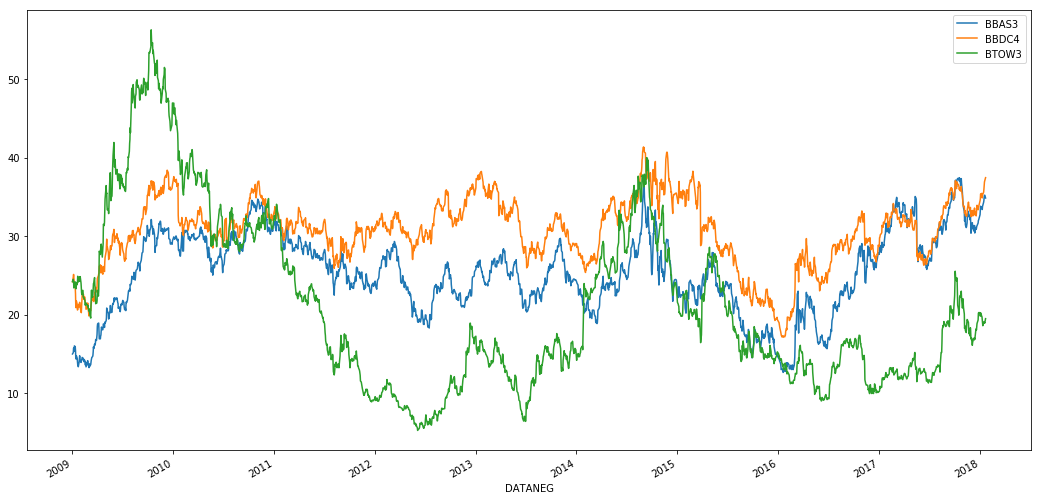

In [179]:
plot_papeis("BBAS3","BBDC4","BTOW3")
#BBAS3: BANCO DO BRASIL ON
#BBDC4: BRADESCO PN
#BTOW3: B2W DIGITAL ON

### Bônus: Plotando um Candlestick

In [196]:
import matplotlib.pyplot as plt
from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as mdates

In [260]:
#DataPrep
df2candle = df.copy()
#Converção de string para datetime
df2candle["DATANEG"] = pd.to_datetime(df2candle["DATPRE"])
df2candle.drop("DATPRE",axis=1,inplace=True)
#Filtrando ano de 2017
df2candle = df2candle.loc[df2candle["DATANEG"].dt.year == 2018, :]
#Recortando apenas colunas de interesse e papel ITUB4
df2candle = df2candle.loc[df2candle["CODNEG"] == "ITUB4",["DATANEG","PREABE","PREMAX","PREMIN","PREULT"]]
#Convertendo data para padrão de datas do matplotlib
df2candle["DATANEG"] = df2candle["DATANEG"].map(mdates.date2num)

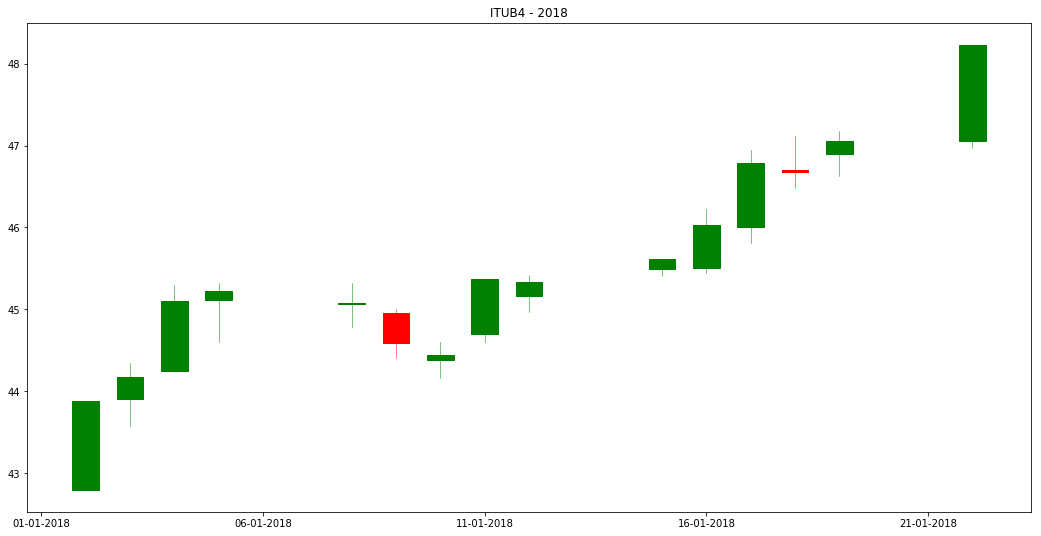

In [262]:
#Plot
#Cria canvas pra plotagem
f1, ax = plt.subplots(figsize = (18,9))
#Cria gráfico candlestick
candlestick_ohlc(ax, df2candle.values, width=.6, colorup='green', colordown='red')
#Formata as datas do matplotlib com formato YYYY-MM
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#Adiciona título
plt.title("ITUB4 - 2018")
#Imprime o gráfico
plt.show()